# Agenda:
* Ejemplo practico (sugerencia de Juan), insertado en la clase  12





In [32]:
!pip install yfinance

In [33]:
import pandas as pd
import yfinance as yf  #yahoo finance

In [34]:
import datetime
import time
import requests
import io
import numpy as np


In [35]:
start = datetime.datetime(2006,1,1)  #año, mes , dia
end = datetime.datetime(2015, 1, 11)

In [36]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [37]:
companies.head(20)

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0
5,AAPL,Apple Inc.,Apple Inc. - Common Stock,Q,N,N,100.0
6,AAVL,"Avalanche Biotechnologies, Inc.","Avalanche Biotechnologies, Inc. - Common Stock",G,N,N,100.0
7,AAWW,Atlas Air Worldwide Holdings,Atlas Air Worldwide Holdings - Common Stock,Q,N,N,100.0
8,AAXJ,iShares MSCI All Country Asia ex Japan Index Fund,iShares MSCI All Country Asia ex Japan Index Fund,G,N,N,100.0
9,ABAC,"Aoxin Tianli Group, Inc.","Aoxin Tianli Group, Inc. - Common Shares",S,N,N,100.0


In [38]:
Symbols= companies['Symbol'].tolist()  # tickers (abreviaturas)
type(Symbols)

list

In [39]:
len(Symbols)

2967

In [40]:
print(Symbols[150:160])

['AMSF', 'AMSG', 'AMSGP', 'AMSWA', 'AMTX', 'AMWD', 'AMZN', 'ANAC', 'ANAD', 'ANAT']


In [41]:
# vamos a hacer una funcion que me devuelve el valor de las acciones entre dos fechas determinanas, para una compani X
def get_stocks(ticker, start,end):
    for count , value in enumerate(Symbols):
        if value == ticker:
            print(count, value)
            break;

    try:
        # baje el precio de la accion
        stock = []
        stock = yf.download(value, start=start, end=end, progress=False)

        if len(stock) ==  0:
            None
        else:
            stock['Name']=value

    except Exception:
        None

    return stock


In [42]:
ticker = 'AMZN'
stock = get_stocks(ticker, start, end)

156 AMZN


In [43]:
stock

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2006-01-03,47.470001,47.849998,46.250000,47.580002,47.580002,7582200,AMZN
2006-01-04,47.490002,47.730000,46.689999,47.250000,47.250000,7440900,AMZN
2006-01-05,47.160000,48.200001,47.110001,47.650002,47.650002,5417200,AMZN
2006-01-06,47.970001,48.580002,47.320000,47.869999,47.869999,6152900,AMZN
2006-01-09,46.549999,47.099998,46.400002,47.080002,47.080002,8943100,AMZN
...,...,...,...,...,...,...,...
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,AMZN


In [44]:
len(stock)

2271

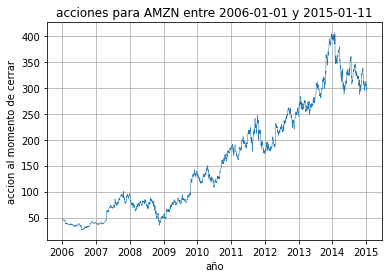

In [45]:
# Graficamos los datos (acciones: )
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('lines', linewidth=0.5)  # por defecto ancho de linea

plt.xlabel("año")
plt.ylabel("accion al momento de cerrar")
plt.title("acciones para {} entre {} y {}".format(ticker, start.date(), end.date()))

close = stock['Close']
plt.grid(True)
plt.plot(close)
# savefig("mifgura.pdf")
plt.show();


In [51]:
N = close.size

log_close=np.log(close)
log_close

Date
2006-01-03    3.862413
2006-01-04    3.855453
2006-01-05    3.863883
2006-01-06    3.868489
2006-01-09    3.851848
                ...   
2015-01-05    5.711056
2015-01-06    5.687958
2015-01-07    5.698502
2015-01-08    5.705315
2015-01-09    5.693496
Name: Close, Length: 2271, dtype: float64

In [52]:
diff_log_close = log_close.diff()
diff_log_close

Date
2006-01-03         NaN
2006-01-04   -0.006960
2006-01-05    0.008430
2006-01-06    0.004606
2006-01-09   -0.016641
                ...   
2015-01-05   -0.020731
2015-01-06   -0.023098
2015-01-07    0.010544
2015-01-08    0.006813
2015-01-09   -0.011818
Name: Close, Length: 2271, dtype: float64

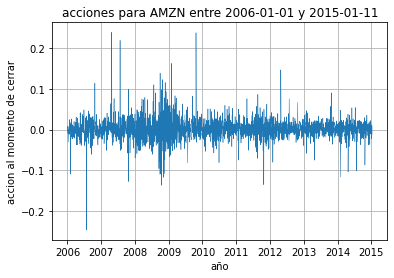

In [54]:
plt.xlabel("año")
plt.ylabel("accion al momento de cerrar")
plt.title("acciones para {} entre {} y {}".format(ticker, start.date(), end.date()))

close = stock['Close']
plt.grid(True)
plt.plot(diff_log_close)
# savefig("mifgura.pdf")
plt.show();


ARIMA(p,d,q) : p orden de AR(p), q es orden de MA(q) y d es la diferencia:1,2,3,

# Estabilizacion de la varianza:
Los datos tiene una varianza que no es estacionaria, se aconseja tomar el logaritmo de los datos. Pero por que?

Vamos a hacer un tema que se llama "transform functions" (funciones de transformacion). 

Asumimos que la vairanza es funcion de la media

$$ \mathbb{V}[X_t] = f(\mu_t) $$. El proposito es encontrar una transformacion $T$ que haga de la varianza algo estacionario.

La transormacion la llamamos $g$.

$$ Y_t = g(X_t) \approx g(\mu_t) + g'(\mu_t) (X_t - \mu_t)$$

Donde $\mathbb{E}[Y] = g ( \mu_t)$ y $\mathbb{V}= (g'(\mu_t))^2 f(\mu_t)  $

Si lo que queremos es que $\mathbb{V}[Y] = C^2$ ($C$ constante) encontramos la  siguiente ecuacion diferencial.

$$  (g'(\mu_t))^2 f(\mu_t) = C^2$$



$$ \frac{d g}{d \mu_t}  =  \frac{C}{\sqrt{f ( \mu_t)} }$$
Toca integrar esta ecuacion diferencial:

$$g(\mu_t) = \int \frac{C d \mu_t}{\sqrt{f(\mu_t)}} $$

Tenemos varias hipotesis:
* La desviacion estandar de $X_t(\mu_t)$ es proporcional a $\mu_t$. 
Es decir $ \mathbb{V}[X_t] = k \mu_t^2 = f(\mu_t) $. 

Encontramos que

$$ g(\mu_t) = \int \frac{C}{\sqrt{k \mu_t^2}} d \mu_t = \frac{C}{\sqrt{k}} \int \frac{d \mu_t}{\mu_t}  = K \log \mu_t  $$

La transformacion en terminos de $X_t$ es 


$$ g(X_t) = \log X_t $$

* La varianza es proporcional al nivel $\mu_t$. Es decir $\mathbb{V}[X_t] = k \mu_t =f(\mu_t) $. 

Tenemos que

$$ g(\mu_t) = \int \frac{C}{\sqrt{k \mu_t}} d \mu_t = \frac{C}{\sqrt{k}}\int \frac{d \mu_t}{\sqrt{ \mu_t}} = K (2 \sqrt{\mu_t}) = K_2 \sqrt{\mu_t}$$

De forma que encontramos la transformacion

$$ g(X_t) = \sqrt{ X_t} $$.

* Si la desviacion estandar es proporcional al cuadrado del nivel $\mu_t$ , 
es decir si $\mathbb{V} [X_t] = c \mu_t^4$. 

$$ g(\mu_t) = \int X \frac{d \mu_t}{\sqrt{c\mu^4}} = \frac{C}{k^2} \int \frac{d \mu_t}{\mu_t^2} = K (-1/\mu_t) $$

Tenemos la transformacion

$$ g(X_t) = - \frac{1}{X_t} $$, $X_t \ne 0$. 

Box y Cox. Notan que estas ecuaciones se acomadan a un patron

$$ F(x_t) = \frac{X^{\lambda}}{\lambda}$$
No sale el logaritmo


Ellos modifican $X_t $ de la siguiente forma

$$ T(X_t) = \frac{X_t^{\lambda} -1}{\lambda}  $$
Tomando la regla de L'Hopital. Obtiene el logaritmo $\log X_t$. 
$X_t^{\lambda}= \mathrm{e}^{\lambda \log X_t}$ 
Luego dicen que el $-1/\lambda$ se puede eliminar (es un drift).

Y definien la tranformacion general

\begin{eqnarray}
T(X_t) = \left \{
    \begin{array}{cc}
    X^{\lambda} & \lambda \ne 0 \\
    \ln X_t & \lambda = 0 
    \end{array}
    \right . 
\end{eqnarray}

Obviamente luego cuando procesamos los datos, los debemos regresar a su estado "original". Si se saco log, toca hacer un exp. Si se saco raiz cuadrada, toca elevar al cuadrado.

9:25

# PACF en procesos  MA(q) 

Vimos que el ACF en MA(q) produce solo $q$ "spikes" luego del $\rho_0=1$ .
Tambien vimos que el PACF produce solo $p$ "spiles" luego del $\rho_0=1$.
O ambos ayudan de una forma u otra (hay dualidad para agregar).

Esto me quedo en tintero. Estudiar el PACF de MA(q). 
Vamos a ver que el PACF no ayuda a predecir el orden q de un MA(q).

El ACF de MA(q):
\begin{eqnarray*}
  \rho_{\tau} = 
  \left \{    % }
  \begin{array}{cc}
    \frac{ \sum_{j=0}^{\mathrm{q}-\tau} \beta_j 
    \beta_{\tau + j}}{\sum_{j=0}^{\mathrm{q}} \beta_j^2} & 0 \le \tau  \le \mathrm{q} \\
    \\
    0 & \tau > \mathrm{q}
  \end{array}
  \right .
\end{eqnarray*}

Ahora nos enfocamos en el PACF.

\begin{eqnarray*}
  P_k  = 
  \frac{ \det
    \begin{pmatrix}
      1 & \rho_1 & \rho_2 & \cdots & \rho_{{k}-2} & \rho_{1}  \\
      \rho_1 & 1 & \rho_1 & \cdots & \rho_{{k}-3} & \rho_{2}  \\
      \vdots &  & & \cdots &  & \vdots \\
      \vdots &  &  & \cdots &  & \vdots \\
      \rho_{{k}-2} & \rho_{{k}-3} & \rho_{{k}-4} & \cdots & 
      1 & \rho_{k-1} \\
      \rho_{{k}-1} & \rho_{{k}-2} & \rho_{{k}-3} & \cdots & 
      \rho_1 & \rho_k \\
    \end{pmatrix}
  }
  {
    \det 
    \begin{pmatrix}
      1 & \rho_1 & \rho_2 & \cdots & \rho_{{k}-2} & \rho_{{k}-1}  \\
      \rho_1 & 1 & \rho_1 & \cdots & \rho_{{k}-3} & \rho_{{k}-2}  \\
      \vdots &  &  & \cdots &  & \vdots \\
      \vdots &  &  & \cdots &  & \vdots \\
      \rho_{{k}-2} & \rho_{{k}-3} & \rho_{{k}-4} & \cdots & 
      1 & \rho_1 \\
      \rho_{{k}-1} & \rho_{{k}-2} & \rho_{{k}-3} & \cdots & 
      \rho_1 & 1 \\
    \end{pmatrix} \, .
  }
\end{eqnarray*}

Esos determinantes no son faciles de calcular. Comenzamos con MA(1). 
En el caso de MA(1) todos los $\rho_k=0$, $k>1$. Solo $
$\rho_0=1$, $\rho_1$ sobreviven.



\begin{eqnarray*}
  P_k  = 
  \frac{ \det
    \begin{pmatrix}
      1 & \rho_1 & 0 & \cdots & \cdots & \cdots & 0 & \rho_{1}  \\
      \rho_1 & 1 & \rho_1 & \ddots &  &  & \vdots & 0  \\
      0  & \rho_1 & 1 &  \rho_1 & \ddots &  & \vdots & \vdots  \\
      \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots & \vdots  \\
      \vdots &  &  \ddots & \ddots & \ddots & \ddots & 0 & \vdots \\
      \vdots &  &  &  \ddots & \rho_1 & 1 & \rho_1 & \vdots  \\
      \vdots & & & & \ddots & \rho_1 & 1 & \vdots  \\
      0 & \cdots & \cdots & \cdots & \cdots & 0  &  \rho_1  & 0 
    \end{pmatrix}
  }
  {
    \det 
    \begin{pmatrix}
      1 & \rho_1 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
      \rho_1 & 1 & \rho_1 & \ddots & & &  & \vdots \\
      0  & \rho_1 & 1 &  \rho_1 & \ddots & &  & \vdots \\
      \vdots & \ddots  & \ddots & \ddots & \ddots & \ddots & &  \vdots \\
      \vdots &  & \ddots  & \ddots & \ddots & \ddots & \ddots & 0  \\
      \vdots &  &  &  \ddots & \rho_1 & 1 & \rho_1 & 0  \\
      \vdots &  & & &  \ddots & \rho_1 & 1 & \rho_1  \\
      0 & \cdots & \cdots & \cdots & \cdots & 0  & \rho_1 & 1
    \end{pmatrix}
  }
\end{eqnarray*}







La matriz del numerador expandida por su ultima columna produce como determinante $(-1)^{k+1} \rho_1^k$.

Trabajamos el denominador.

La matriz es tridiagonal. De la forma.


\begin{eqnarray}
  A_k = \det
  \begin{pmatrix}
    a & b & 0 & 0 & \cdots & 0 \\
    c & a & b & 0 &  \cdots & 0 \\
    0 & c & a & b  &  \cdots & 0 \\
    \vdots & \vdots & \vdots   & \cdots &  \vdots  \\
    0 & 0 &  & \vdots & c & a
  \end{pmatrix} .
\end{eqnarray}

si expandemos $A_k$ por la primera fila en $a$ y luego en $b$
encontramos

$$ A_k = a A_{k-1} - b (c A_{k-2})$$


Si recordamos las ecuacioness en diferencias esta formula se puede resolver analiticamente (recureden la tarea de Fibonacci).

El polinomio caracteristico.

$$ P(\lambda) = 1 - a \lambda + bc \lambda^2 $$
Las raices son:

$$r_{1,2} = \frac{a \pm \sqrt{a^2 - 4 bc}}{2 bc} $$
Recuerden que $a=1, b=c=\rho_1$.

De forma que

$$ r_{\pm} = \frac{1 \pm \sqrt{1 - 4 \rho_1^2}}{2 \rho_2}$$
 
si quisieramos seguir adelante con este metodo (ya lo usamos en AR(2) homogeneo) 

$$ A_k = C_1 r_1^k + C_2 r_2^k $$.
Quien es $C_1$, $C_2$? condiciones iniciales.

Pensemos en $A_0=1$, y $A_1=a=1$. $A_2=a A_1 - bc A_0= 1 - \rho_1^2 $

Arrancamos de 0 que hace todo mas simple 

We have 
\begin{eqnarray*}
   A_0 &=& C_1 + C_2   \\
  A_1 &=&  C_1 r_1 + C_2 r_2.
\end{eqnarray*}
That is,
\begin{eqnarray*}
  1 &=& C_1 + C_2  \quad  (1) \\
  1 &=& C_1 \frac{1 + \sqrt{1 -4 \rho_1^2}}{2 \rho_1^2} + C_2 \frac{1 - \sqrt{1 - 4\rho_1^2}}{2 \rho_1^2} \\
\end{eqnarray*}
The second equation can be changed to

$$ 2 \rho_1^2 = C_1 + C_2 + \sqrt{1-4\rho^2}(C_1 - C_2)$$

using the first equation

$$ 2 \rho_1^2 = 1 + \sqrt{1 - 4\rho^2} (C_1 - C_2)$$
or

$$ \frac{2 \rho_1^2 -1}{\sqrt{1 - 4\rho^2}} = C_1 -C_2 \quad  (2)$$

Adding (1) and (2):

$$ \frac12 + \frac{\rho_1^2-1}{\sqrt{1-4\rho^2}} = C_1$$
subtracting (2) from (1)

$$ \frac12 - \frac{ \rho_1^2 - 1}{\sqrt{1 - 4\rho_1^2}} = C_2 $$

Por este lado tire la toalla.

Que camino cogi?

Comenzar de abajo hacia arriba y buscar un patron, usando los $\beta_1$
no los $\rho_1$ (este patron yo se existe de los libros).

$P_0=\rho_0 = 1 $

$P_1 = \rho_1 = \frac{\beta_1}{1 + \beta_1^2}$



\begin{eqnarray}
P_2 &=& -\frac{\rho_1^2}{1 - \rho_1^2} \\
&=& - \frac{\beta_1^2}{(1 + \beta_1^2)^2}/ \left ( 1 - \frac{\rho_1^2}{1 - \rho_1^2} \right ) = -\frac{\beta_1^2}{(1 + \beta_1^2)^2 \left ( 1 - \frac{\beta_1^2}{(1 + \beta_1^2)^2} \right )} \\
&=& - \frac{\beta_1^2}{(1 + \beta_1^2)^2 - \beta_1^2} \\
&=& - \frac{\beta_1^2 }{1 + 2 \beta_1^2 + \beta_1^4 - \beta_1^2 }  \\
&=& - \frac{\beta_1^2}{1 + \beta_1^2 + \beta_1^4}
\end{eqnarray}



$$ $$


\begin{eqnarray*}
  P_3 &=& \frac{\rho_1^3}{1 - 2 \rho_1^2} \\
  &=& \frac{\beta_1^3}{(1 + \beta_1^2)^3 \left ( 1 - 2 \frac{\beta_1^2}{( 1 + \beta_1^2)^2} \right )} \\
  &=& \frac{\beta_1^3}{(1 + \beta_1^2)^3 - 2 \beta_1^2 (1 + \beta_1^2)} \\
  &=& \frac{\beta_1^3}{1 + 3 \beta_1^2 + 3 \beta_1^4 + \beta_1^6 - 2 \beta_1^2 - 2 \beta_1^4} \\
  &=& \frac{\beta_1^3}{1 + \beta_1^2 + \beta_1^4 + \beta_1^6 }
\end{eqnarray*}






El partron sugiere

$$ P_k = \frac{(-1)^{k+1} \beta_1^k}{ 1 + \beta_1^2 + \beta_1^4 + \cdots \beta_1^{2k}} = \frac{(-1)^{k+1} \beta_1^k}{\sum_{i=0}^k \beta_1^{2i}}$$

De hecho esta formula la prueba por induccion matematica en el apendice D de las notas. 

Recuerde el cociente notable

$$ \sum_{i=0}^{k} \beta_1^{2 i} = \frac{\beta^{2i+2} - 1}{\beta^2 -1} $$